<a href="https://colab.research.google.com/github/divyanshuraj6815/eva/blob/master/Assignment%209/Assignment_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Call heavenly Gods
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2

In [50]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
print (train_features.shape)
print (train_labels.shape)
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

(50000, 32, 32, 3)
(50000, 1)


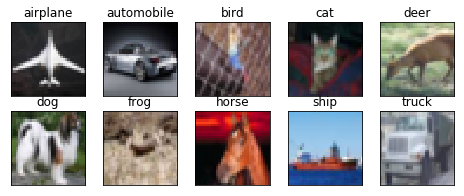

In [51]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
for_heatmap_plot = dict ()
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    for_heatmap_plot[ class_names[i] ] = train_features[idx]
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
def create_model ():
  model = Sequential()

  model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Convolution2D(48, 3, 3))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Convolution2D(96, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Convolution2D(96, 3, 3))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Convolution2D(192, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Convolution2D(192, 3, 3))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Convolution2D(192, 3, 3))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Convolution2D(10, 2, 2))
  model.add(Activation('relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Activation('softmax'))
  # Compile the model
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [56]:
model = [create_model (), create_model ()]
model[0].summary ()
model[1].summary ()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_41 (Conv2D)           (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_46 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_41 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_47 (Activation)   (None, 30, 30, 48)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 30, 30, 48)       

Epoch 1/50
  1/390 [..............................] - ETA: 58s - loss: 0.8006 - acc: 0.7344

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  # This is added back by InteractiveShellApp.init_path()


390/390 [==============================] - 44s 113ms/step - loss: 0.8490 - acc: 0.6881 - val_loss: 0.6741 - val_acc: 0.7851
Epoch 2/50
390/390 [==============================] - 44s 112ms/step - loss: 0.8116 - acc: 0.6968 - val_loss: 0.7672 - val_acc: 0.7543
Epoch 3/50
390/390 [==============================] - 44s 112ms/step - loss: 0.7745 - acc: 0.7103 - val_loss: 0.6551 - val_acc: 0.7925
Epoch 4/50
390/390 [==============================] - 44s 114ms/step - loss: 0.7488 - acc: 0.7148 - val_loss: 1.2228 - val_acc: 0.6124
Epoch 5/50
390/390 [==============================] - 44s 112ms/step - loss: 0.7197 - acc: 0.7250 - val_loss: 0.6687 - val_acc: 0.7890
Epoch 6/50
390/390 [==============================] - 46s 117ms/step - loss: 0.6999 - acc: 0.7299 - val_loss: 0.6851 - val_acc: 0.7849
Epoch 7/50
390/390 [==============================] - 45s 116ms/step - loss: 0.6738 - acc: 0.7370 - val_loss: 0.7005 - val_acc: 0.7815
Epoch 8/50
390/390 [==============================] - 44s 112ms/st

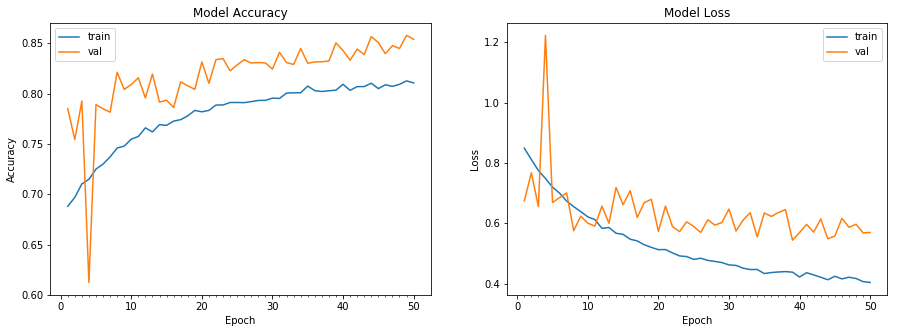

Accuracy on test data is: 85.39


In [68]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

# train the model
start = time.time()
# Train the model
model_info = model[0].fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model[0]))

In [0]:
def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

Epoch 1/50
  1/390 [..............................] - ETA: 53s - loss: 1.0931 - acc: 0.6250

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  del sys.path[0]


390/390 [==============================] - 46s 119ms/step - loss: 1.0718 - acc: 0.6153 - val_loss: 0.9084 - val_acc: 0.7082
Epoch 2/50
390/390 [==============================] - 47s 120ms/step - loss: 1.0325 - acc: 0.6283 - val_loss: 1.0089 - val_acc: 0.6813
Epoch 3/50
390/390 [==============================] - 47s 120ms/step - loss: 0.9835 - acc: 0.6447 - val_loss: 0.8195 - val_acc: 0.7368
Epoch 4/50
390/390 [==============================] - 47s 120ms/step - loss: 0.9582 - acc: 0.6500 - val_loss: 0.6873 - val_acc: 0.7779
Epoch 5/50
390/390 [==============================] - 47s 122ms/step - loss: 0.9213 - acc: 0.6605 - val_loss: 0.6857 - val_acc: 0.7802
Epoch 6/50
390/390 [==============================] - 47s 120ms/step - loss: 0.8917 - acc: 0.6727 - val_loss: 0.6971 - val_acc: 0.7694
Epoch 7/50
390/390 [==============================] - 47s 120ms/step - loss: 0.8744 - acc: 0.6735 - val_loss: 0.7346 - val_acc: 0.7665
Epoch 8/50
390/390 [==============================] - 47s 120ms/st

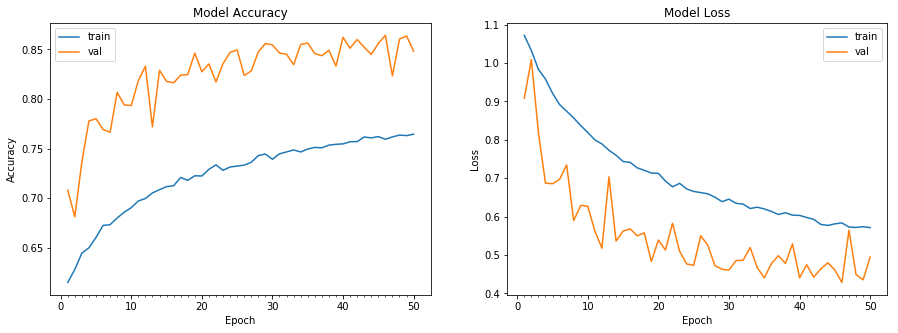

Accuracy on test data is: 84.83


In [69]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1))


# train the model
start = time.time()
# Train the model
model_info = model[1].fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model[1]))

In [0]:
def heat_map (data, model1, model1_name, model2, model2_name):
  
  def generate_heat_map (img, model, name):
    x = img.astype('float32')/255
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer(name)
    
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for i in range(192):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
      heatmap = np.mean(conv_layer_output_value, axis=-1)
      heatmap = np.maximum(heatmap, 0)
      heatmap /= np.max(heatmap)
    return heatmap
  
  h = 10
  w = 10
  fig = plt.figure (figsize = (20, 20))
  columns = 7
  rows = len (data.keys())
  classes = list (data.keys ())
  #print (classes[1])
  for i, classe in enumerate (classes):
    img = data[ classes[i] ][0]
    ax = fig.add_subplot(rows, columns, (i*columns)+4, xticks=[], yticks=[])
    ax.set_title (classes[i])
    plt.imshow(img)
    
    h1 = generate_heat_map (data[ classes[i] ], model1, model1_name)
    ax = fig.add_subplot(rows, columns, (i*columns)+3, xticks=[], yticks=[])
    ax.set_title ('heatmap')
    plt.imshow(h1)
    heatmap = cv2.resize(h1, (img.shape[0], img.shape[1]))
    heatmap = np.uint8(255*heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    ax = fig.add_subplot(rows, columns, (i*columns)+2, xticks=[], yticks=[])
    ax.set_title ('resized heatmap')
    plt.imshow(heatmap)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0, dtype=cv2.CV_32F)
    superimposed_img = superimposed_img.astype(int)
    ax = fig.add_subplot(rows, columns, (i*columns)+1, xticks=[], yticks=[])
    ax.set_title ('superimposed image')
    plt.imshow(superimposed_img)
    
    h2 = generate_heat_map (data[ classes[i] ], model2, model2_name)
    ax = fig.add_subplot(rows, columns, (i*columns)+5, xticks=[], yticks=[])
    ax.set_title ('heatmap with cutout')
    plt.imshow(h2)
    heatmap = cv2.resize(h2, (img.shape[0], img.shape[1]))
    heatmap = np.uint8(255*heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    ax = fig.add_subplot(rows, columns, (i*columns)+6, xticks=[], yticks=[])
    ax.set_title ('resized heatmap')
    plt.imshow(heatmap)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0, dtype=cv2.CV_32F)
    superimposed_img = superimposed_img.astype(int)
    ax = fig.add_subplot(rows, columns, (i*columns)+7, xticks=[], yticks=[])
    ax.set_title ('superimposed image')
    plt.imshow(superimposed_img)
    #break
  plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.6

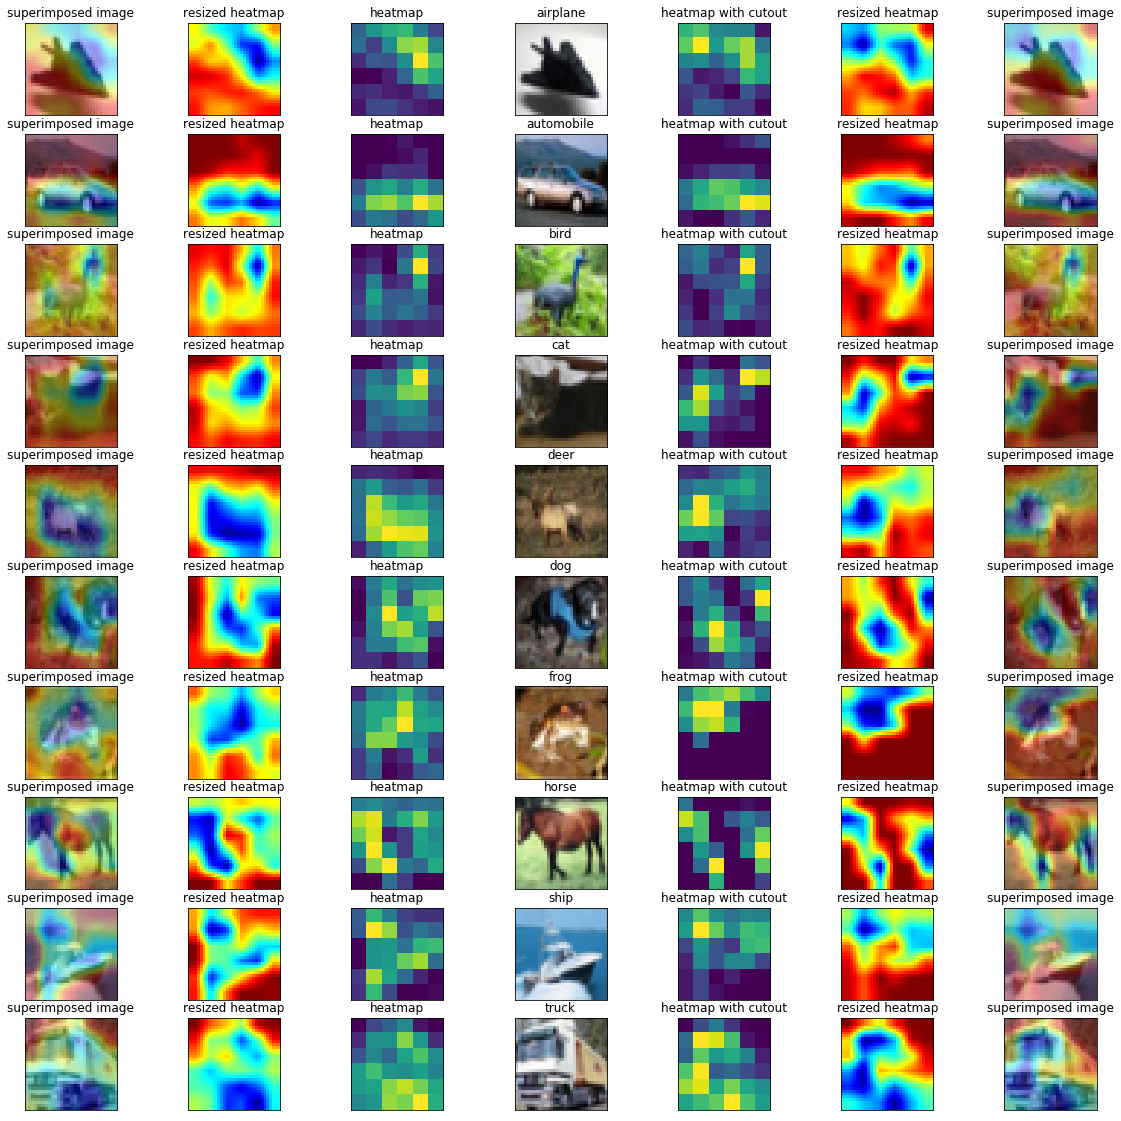

In [71]:
heat_map (for_heatmap_plot, model[0], 'conv2d_45', model[1], 'conv2d_53')